# Sentiment Analysis of Yelp Reviews Using Machine Learning

#### Project Goal:
The goal of this project is to build a machine learning model that can classify Yelp reviews as positive or negative based on sentiment analysis. 
By leveraging natural language processing (NLP) techniques and various classification algorithms, the project aims to:

Predict whether a review is positive (5-star) or not.
Analyze the relationship between review text and star ratings.
Identify the most engaging reviews based on user reactions (cool, useful, funny).
Compare different machine learning models to find the best performer.
Save the best model and vectorizer for future sentiment classification tasks.
This project provides insights into customer sentiments, helps businesses understand user feedback, and can be used to automate review sentiment classification.

In [2]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import joblib

#### Data Loading and Cleaning: 
Data is loaded, cleaned by removing unnecessary columns, and missing values are handled. A binary target (is_good_review) is created.

In [4]:
# Step 2: Data Loading
df = pd.read_csv('C:/Users/sowjanya/Desktop/Data Science Projects/Sentiment Analysis/yelp.csv')
df.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
# Step 3: Data Cleaning
df.drop(labels=['business_id', 'date', 'review_id', 'type', 'user_id'], inplace=True, axis=1)
df = df.dropna(subset=['text'])
df['is_good_review'] = df['stars'].apply(lambda x: 1 if x == 5 else 0)


#### Exploratory Data Analysis: 
Distribution of positive vs. negative reviews is visualized, and review length vs. star rating is explored.

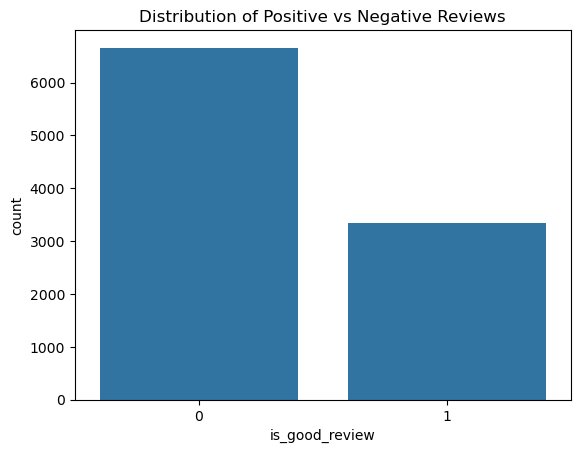

In [7]:
# Step 4: Exploratory Data Analysis (EDA)
sns.countplot(x='is_good_review', data=df)
plt.title('Distribution of Positive vs Negative Reviews')
plt.show()


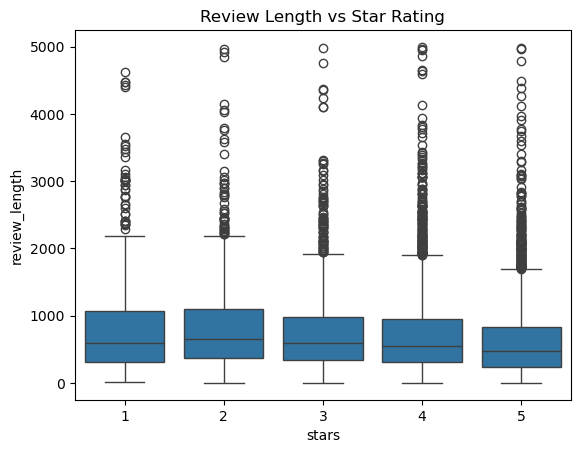

In [8]:
# Visualizing Review Length vs Star Rating
df['review_length'] = df['text'].apply(len)
sns.boxplot(x='stars', y='review_length', data=df)
plt.title('Review Length vs Star Rating')
plt.show()

#### Feature Engineering: 
TF-IDF vectorizer is used to convert text data into a numerical format.

In [10]:
# Step 5: Feature Engineering
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['is_good_review']

#### Model Training & Evaluation: 
Various machine learning models (Logistic Regression, Naive Bayes, SVM, Random Forest) are trained and evaluated using accuracy and ROC AUC scores.

In [12]:
# Step 6: Model Training & Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)
    results[name] = {"accuracy": accuracy, "roc_auc": roc_auc, "fpr": fpr, "tpr": tpr, "model": model}

#### Model Evaluation: 
Confusion matrix and ROC curves are plotted to compare the models visually.

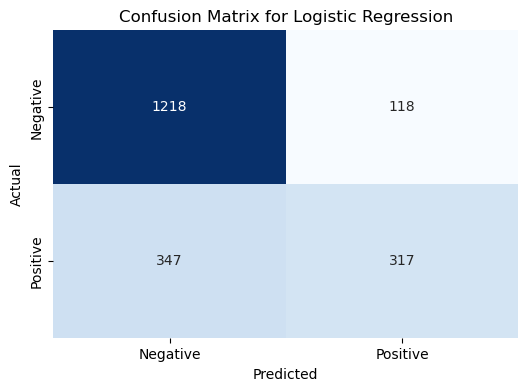

In [14]:
# Step 7: Model Evaluation (Confusion Matrix and ROC Curve)
fig, ax = plt.subplots(figsize=(6, 4))
best_model = max(results, key=lambda model: results[model]['accuracy'])
cm = confusion_matrix(y_test, results[best_model]['model'].predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", ax=ax, cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(f'Confusion Matrix for {best_model}')
plt.show()

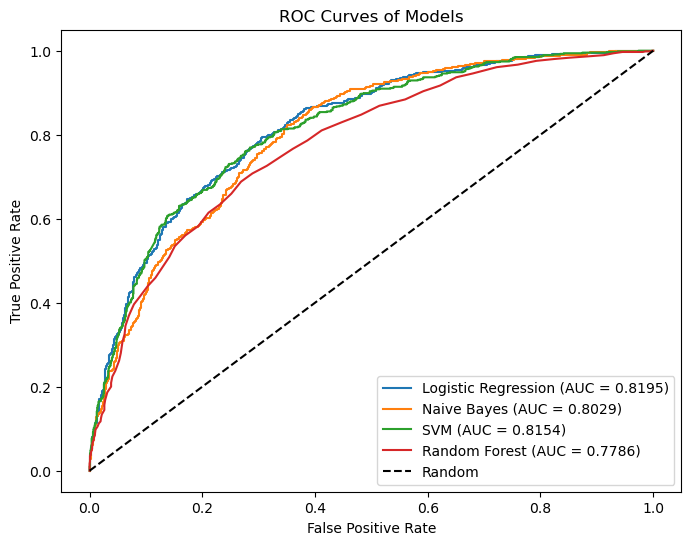

In [15]:
plt.figure(figsize=(8, 6))
for name, result in results.items():
    plt.plot(result['fpr'], result['tpr'], label=f"{name} (AUC = {result['roc_auc']:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Models')
plt.legend()
plt.show()


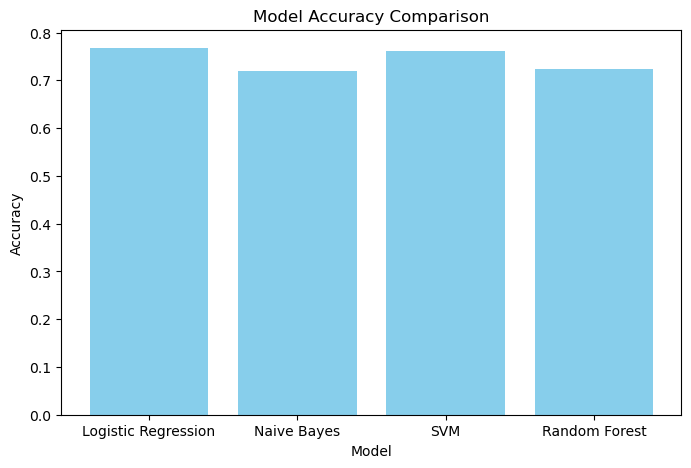

In [16]:
# Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar([name for name in results], [result["accuracy"] for result in results.values()], color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

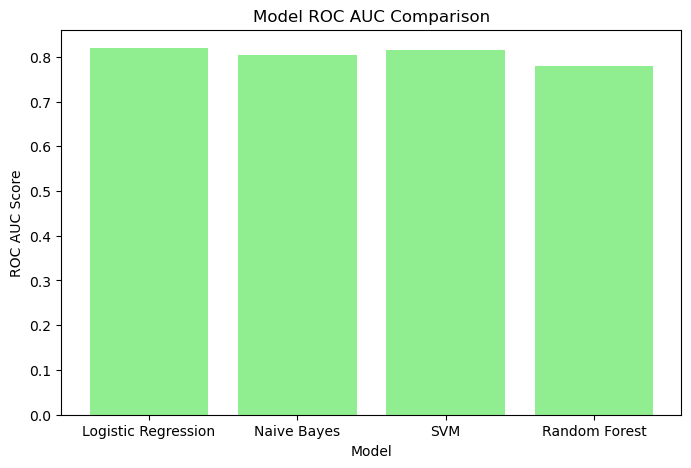

In [17]:
# ROC AUC Comparison
plt.figure(figsize=(8, 5))
plt.bar([name for name in results], [result["roc_auc"] for result in results.values()], color='lightgreen')
plt.xlabel("Model")
plt.ylabel("ROC AUC Score")
plt.title("Model ROC AUC Comparison")
plt.show()


#### Review Analysis: 
The percentage of positive reviews for each star rating is plotted, and the best star rating category is identified.

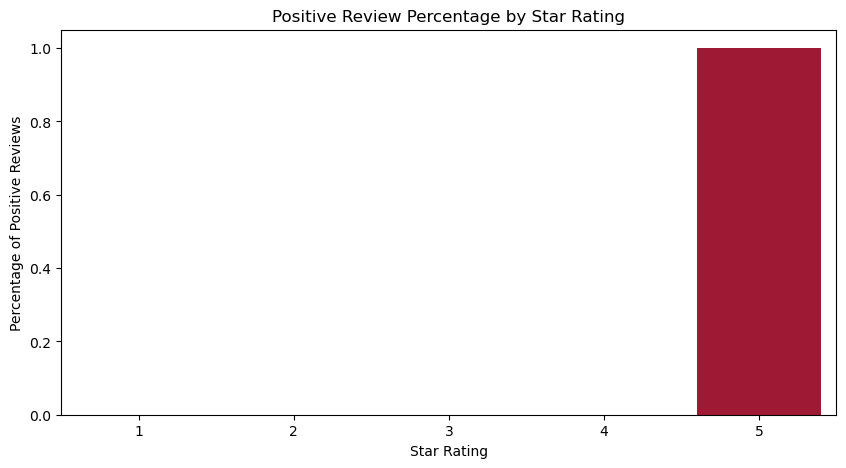

In [50]:
# Step 8: Review Analysis (Finding Best Star Rating)
top_ratings = df.groupby('stars')['is_good_review'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_ratings.index, y=top_ratings.values, hue=top_ratings.index, palette='coolwarm', legend=False)
plt.xlabel("Star Rating")
plt.ylabel("Percentage of Positive Reviews")
plt.title("Positive Review Percentage by Star Rating")
plt.show()

In [20]:
best_star_rating = top_ratings.idxmax()
best_percentage = top_ratings.max() * 100
print(f"⭐ The highest-rated category is {best_star_rating}-star reviews with {best_percentage:.2f}% positive sentiment.")

⭐ The highest-rated category is 5-star reviews with 100.00% positive sentiment.


#### Most Engaging Review: 
The review with the highest engagement score is displayed.

In [22]:
# Step 9: Most Engaging Review
df['engagement_score'] = df[['cool', 'useful', 'funny']].sum(axis=1)
most_engaging_review = df.loc[df['engagement_score'].idxmax()]
print("📢 **Most Engaging Review:**")
print(most_engaging_review['text'])
print(f"👍 Useful: {most_engaging_review['useful']}, 😆 Funny: {most_engaging_review['funny']}, 😎 Cool: {most_engaging_review['cool']}")


📢 **Most Engaging Review:**
Love this place! Amazing Happy Hour Specials!!
👍 Useful: 76, 😆 Funny: 0, 😎 Cool: 77


#### Top 10 Engaging Reviews: 
Displays the top 10 reviews based on engagement score.

In [24]:
# Step 10: Top 10 Engaging Reviews
top_10_engaging_reviews = df.sort_values(by='engagement_score', ascending=False).head(10)
top_10_engaging_reviews[['text', 'useful', 'funny', 'cool', 'engagement_score']]


,text,useful,funny,cool,engagement_score
4957,Love this place! Amazing Happy Hour Specials!!,76,0,77,153
9634,Scary things to me:\nParis Hilton has a career...,38,57,38,133
180,Hippies scare me. So in my preparation to ...,28,39,28,95
9843,"As far as I know, I'm the only person in this ...",30,20,32,82
6495,Why'd the chicken cross the road?\nTo get to F...,31,24,27,82
556,"Tandoori Times\n\nVolume 1, Issue 1, Number 1....",23,27,22,72
778,Yeah...notsomuch.\n\nSprinkles is sooooooooo n...,20,30,17,67
9283,"In the age old debate of length v. girth, Sky ...",19,24,16,59
3753,I have had chicken. I have had waffles. And no...,17,23,19,59
4637,I really enjoy this place. It's beautifully de...,24,11,23,58


#### Saving the Best Model & Vectorizer: 
The best performing model is saved, along with the TF-IDF vectorizer, for future use or deployment.

In [26]:
# Step 11: Save the Best Model & Vectorizer
best_model_name = max(results, key=lambda model: results[model]['accuracy'])  # Select the best model by accuracy
best_model = results[best_model_name]['model']  # Retrieve the best model

print(f"Selected Best Model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}, ROC AUC: {results[best_model_name]['roc_auc']:.4f}")



Selected Best Model: Logistic Regression
Accuracy: 0.7675, ROC AUC: 0.8195


In [27]:
# Save the trained best model
joblib.dump(best_model, 'best_sentiment_model.pkl')
print("Best model saved as 'best_sentiment_model.pkl'.")

Best model saved as 'best_sentiment_model.pkl'.


In [28]:
# Save the vectorizer for transforming new text data during deployment
joblib.dump(vectorizer, 'best_vectorizer.pkl')
print("TF-IDF Vectorizer saved as 'best_vectorizer.pkl'.")

TF-IDF Vectorizer saved as 'best_vectorizer.pkl'.
